## Sentiment Analysis Of IMDB Movie Reviews

### Task Overview:

1.  **Imported necessary libraries**: We've imported libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and building the deep learning model (tensorflow, keras).
2.  **Loaded and inspected the data**: We loaded the IMDB dataset, checked its shape, viewed the head and tail of the data, and examined the data types and checked for missing values.
3.  **Visualized sentiment distribution**: We created a count plot to visualize the distribution of positive and negative reviews, confirming a balanced dataset.
4.  **Performed EDA with Word Clouds**: We generated word clouds for all reviews, as well as separately for negative and positive reviews, to visualize the most frequent words in each category.
5.  **Split data into training and testing sets**: We split the dataset into training and testing sets to prepare for model training.
6.  **Tokenized and padded the text data**: We used a Tokenizer to convert the text reviews into sequences of numbers and then padded these sequences to a fixed length for input into the neural network.
7.  **Encoded the sentiment labels**: We used LabelEncoder to convert the 'positive' and 'negative' sentiment labels into numerical format (0 and 1).
8.  **Defined and built the model**: We defined a sequential LSTM model for sentiment analysis and explicitly built it to see the model summary and trainable parameters.
9.  **Compiled the model**: We configured the model for training by specifying the optimizer, loss function, and metrics.
10. **Trained the model**: We trained the LSTM model on the training data.
11. **Evaluated the model**: We evaluated the trained model on the test data to get the loss and accuracy.
12. **Created a predictive system**: We defined a function to take a new review, preprocess it, and use the trained model to predict its sentiment.
13. **Tested the predictive system**: We tested the predictive system with example positive and negative reviews.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Inspection

In [4]:
data= pd.read_csv("IMDB_Dataset.csv")

In [5]:
data.shape

(50000, 2)

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
data.isnull().sum()

,0
review,0
sentiment,0


In [11]:
data.dtypes

,0
review,object
sentiment,object


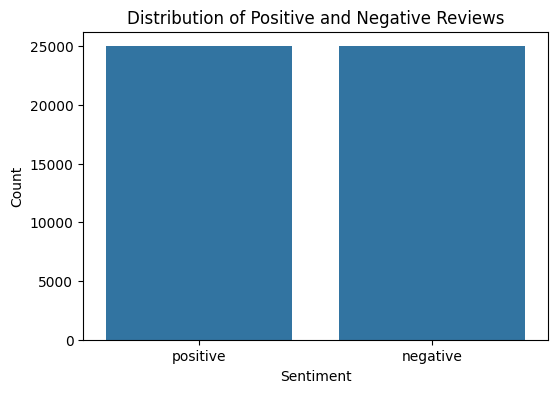

In [12]:
import matplotlib.pyplot as plt
# Visualize the distribution of positive and negative reviews
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


### EDA With Word Clouds

In [43]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv = CountVectorizer(stop_words='english')
words= cv.fit_transform(data.review)

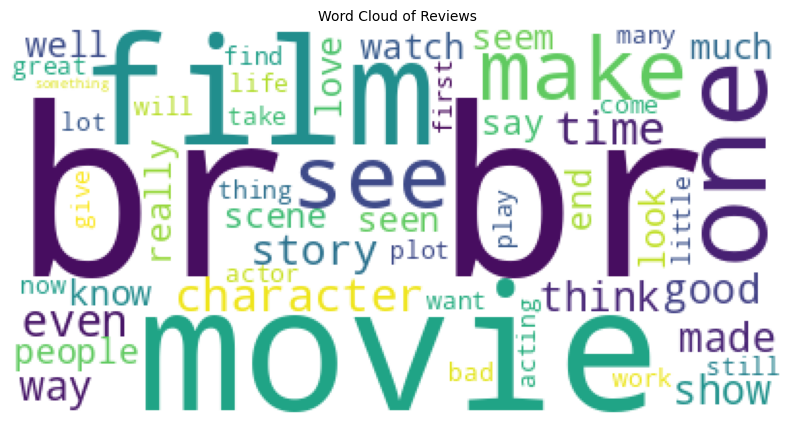

In [45]:
#combine all reviews
reviews= ' '.join(data['review'])

#Initialise word Cloud Object
wc= WordCloud(background_color='white', max_words=50)

#Generate and Plot WordCloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("Word Cloud of Reviews", fontsize=10)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Word Cloud of Negative Reviews')

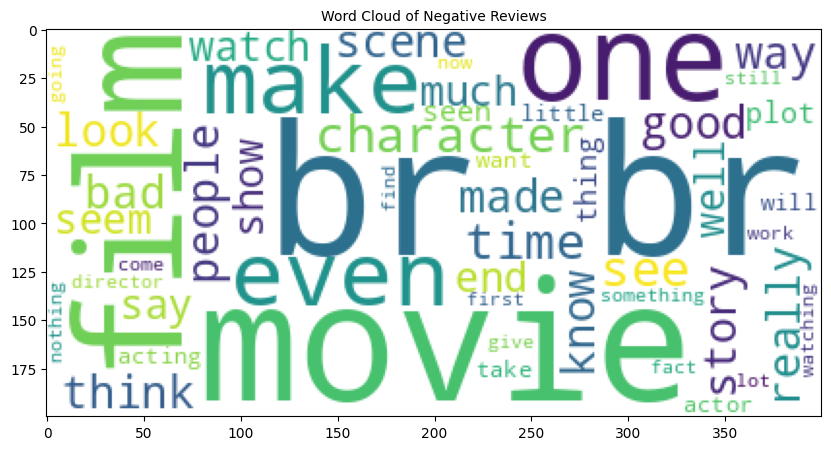

In [46]:
neg_reviews= ' '.join(data[data['sentiment']=='negative'].review)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(neg_reviews))
plt.title("Word Cloud of Negative Reviews", fontsize=10)

Text(0.5, 1.0, 'Word Cloud of Positive Reviews')

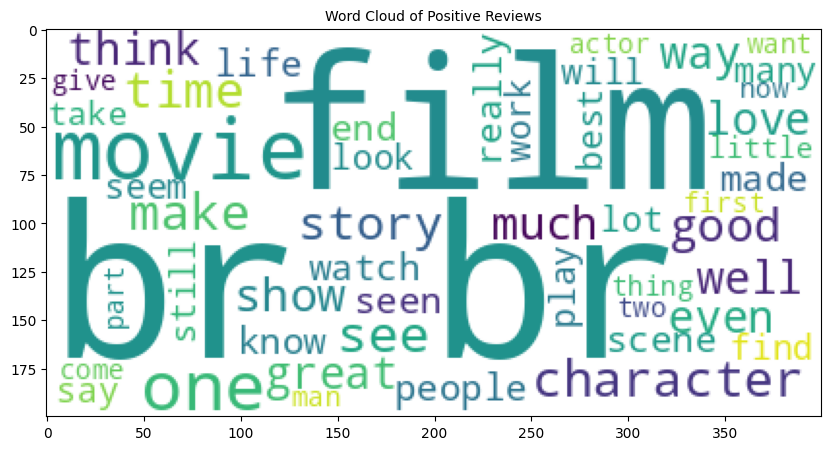

In [47]:
pos_reviews = "".join(data[data['sentiment']=='positive'].review)
plt.figure(figsize=[10,10])
plt.imshow(wc.generate(pos_reviews))
plt.title("Word Cloud of Positive Reviews", fontsize=10)

### Splitting Data into Test and Training Dataframes

In [16]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
train_data, test_data= train_test_split(data,random_state=42,test_size=0.2)

In [19]:
train_data.shape

(40000, 2)

In [20]:
test_data.shape

(10000, 2)

In [21]:
tokeniser= Tokenizer(num_words=10000)
tokeniser.fit_on_texts(train_data["review"])

In [22]:
X_train= pad_sequences(tokeniser.texts_to_sequences(train_data["review"]),maxlen=100)
X_test= pad_sequences(tokeniser.texts_to_sequences(test_data["review"]),maxlen=100)

In [23]:
X_train.shape

(40000, 100)

In [24]:
X_test.shape

(10000, 100)

In [26]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [27]:
print(Y_train.shape)
print(Y_test.shape)

(40000,)
(10000,)


### Model Setup

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

print("Y_train after label encoding:", Y_train[:5])
print("Y_test after label encoding:", Y_test[:5])

Y_train after label encoding: [0 0 1 0 0]
Y_test after label encoding: [1 1 0 1 0]


In [29]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=100),
    keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True), # First LSTM layer returns sequences
    keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2), # Second LSTM layer does not return sequences
    keras.layers.Dropout(0.2), # Add dropout after LSTM
    keras.layers.Dense(1, activation="sigmoid") # Final Dense layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
# Build the model with the input shape
model.build(input_shape=(None, 100))

# Display the model summary again to see the parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 128)       │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,713 (1.08 MB)

 Trainable params: 283,713 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

We used 'adam' as an optimizer for the model

Since this a binary classification task we used binary crossentropy as our loss function which we need to minimise.

We measured the effectiveness of our model using the accuracy metric.

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(X_train, Y_train, epochs = 2, batch_size = 64, validation_split = 0.2)

Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 190s 379ms/step - accuracy: 0.8868 - loss: 0.2907 - val_accuracy: 0.8515 - val_loss: 0.3575
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 209s 394ms/step - accuracy: 0.9051 - loss: 0.2449 - val_accuracy: 0.8525 - val_loss: 0.3601


In [36]:
loss, accuracy= model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.8524 - loss: 0.3570


In [37]:
print(loss)

0.3512067198753357


In [38]:
print(accuracy)

0.8565000295639038


In [39]:
def predictive_system(review):
  sequences= tokeniser.texts_to_sequences([review])
  padded_sequences= pad_sequences(sequences,maxlen=200)
  prediction= model.predict(padded_sequences)
  if prediction > 0.5:
    print("Positive Review")
  else:
    print("Negative Review")

In [40]:
predictive_system("I like the cinematic art style of the movie")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Positive Review


In [41]:
predictive_system("The movie's plot had no meaning and general direction")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Negative Review


## In short Our Model did a great job at detecting the sentiment of a review with an overall 85.6% accuracy!